In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
crop = pd.read_csv('/content/drive/MyDrive/RandomForest/Crop_recommendation (1).csv')

In [4]:
crop.head(300)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
295,57,56,78,17.341502,18.756263,8.861480,67.954543,chickpea
296,48,65,78,17.437327,14.338474,7.861128,73.092670,chickpea
297,36,56,83,18.897802,19.761829,7.452671,69.095125,chickpea
298,40,58,75,18.591908,14.779596,7.168096,89.609825,chickpea


In [5]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop.size

17600

In [8]:
crop.shape

(2200, 8)

In [7]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

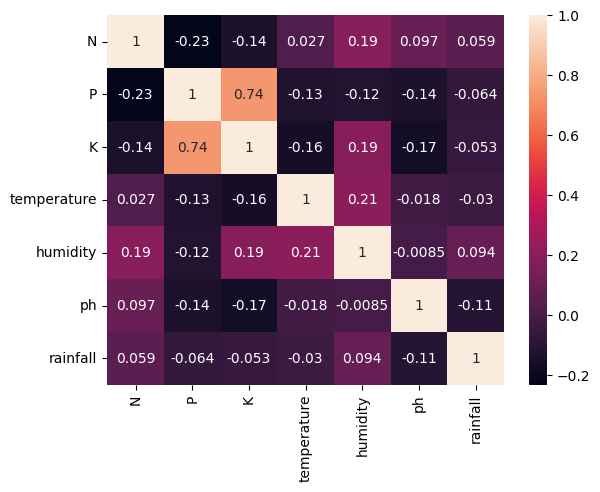

In [ ]:
sns.heatmap(crop.corr(),annot=True)

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

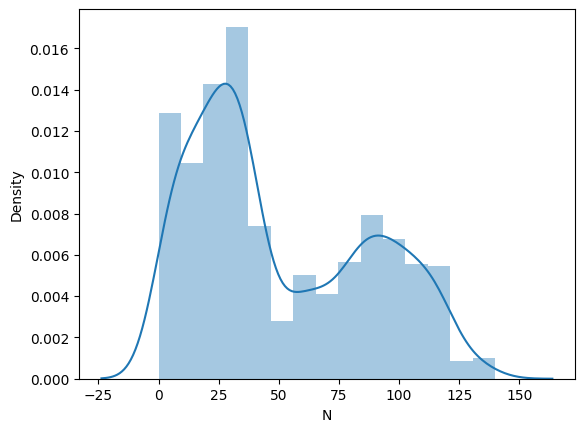

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [ ]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [ ]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['crop_num']

labels = crop['crop_num']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

Xtrain = ms.fit_transform(Xtrain)
Xtest = ms.transform(Xtest)

In [ ]:
Xtrain

array([[0.9       , 0.32142857, 0.07      , ..., 0.78715385, 0.48581744,
        0.20971409],
       [0.27142857, 0.39285714, 0.075     , ..., 0.54104772, 0.61994634,
        0.09553932],
       [0.09285714, 0.5       , 0.075     , ..., 0.24534629, 0.54037401,
        0.57010688],
       ...,
       [0.22857143, 0.35714286, 0.235     , ..., 0.9068582 , 0.538542  ,
        0.50097736],
       [0.60714286, 0.2       , 0.1       , ..., 0.44622175, 0.52968777,
        0.60673222],
       [0.58571429, 0.15      , 0.21      , ..., 0.924014  , 0.47595634,
        0.01433024]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

In [ ]:
Xtrain

array([[ 2.00981512, -0.10252785, -0.57108995, ...,  0.45790544,
         0.19869846, -0.45213157],
       [-0.35729843,  0.19877289, -0.55145528, ..., -0.50496041,
         1.29727894, -1.02578954],
       [-1.02977387,  0.65072401, -0.55145528, ..., -1.66186298,
         0.64554312,  1.3586203 ],
       ...,
       [-0.51869253,  0.04812252,  0.07685411, ...,  0.92623685,
         0.63053805,  1.01128702],
       [ 0.9069554 , -0.61473911, -0.45328194, ..., -0.87595765,
         0.55801769,  1.54264009],
       [ 0.82625834, -0.82564963, -0.02131923, ...,  0.99335722,
         0.11793132, -1.43381516]])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, random_state=0)

RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9977272727272727
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        17
           3       1.00      0.96      0.98        23
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        25
          17       1.00      1.00      1.00

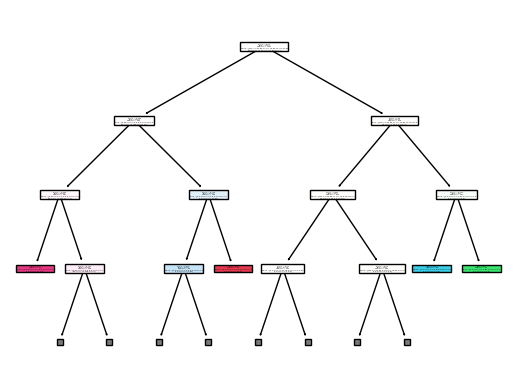

In [ ]:
from sklearn.tree import plot_tree
tree_index=3
plot_tree(RF.estimators_[tree_index], max_depth=3, filled=True)
plt.show()


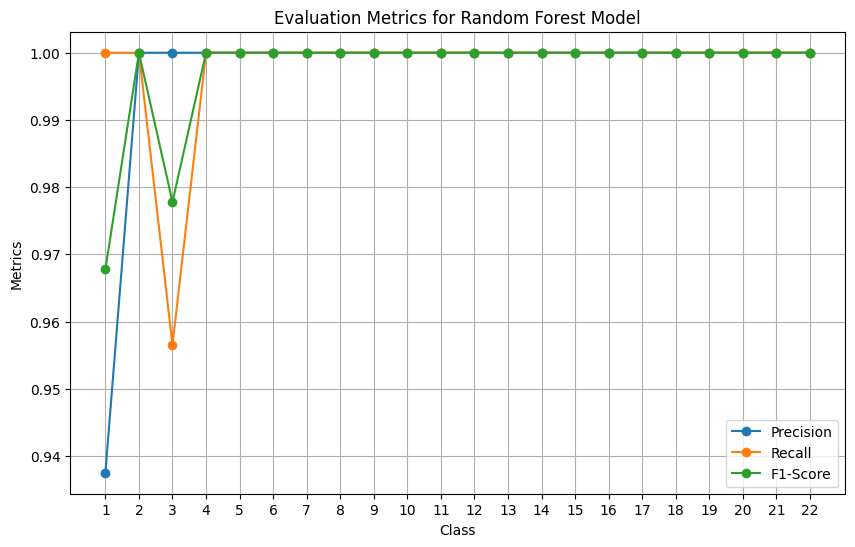

RF's Accuracy is: 0.9977272727272727
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        17
           3       1.00      0.96      0.98        23
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        25
          17       1.00      1.00      1.00 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and train the Random Forest model


# Make predictions on the test data
predicted_values = RF.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision, recall, and F1-score
report = classification_report(Ytest, predicted_values, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [report[str(i)]['precision'] for i in range(1, len(report) - 2)]
recall = [report[str(i)]['recall'] for i in range(1, len(report) - 2)]
f1_score = [report[str(i)]['f1-score'] for i in range(1, len(report) - 2)]

# Plot evaluation metrics
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(report) - 2), precision, marker='o', label='Precision')
plt.plot(range(1, len(report) - 2), recall, marker='o', label='Recall')
plt.plot(range(1, len(report) - 2), f1_score, marker='o', label='F1-Score')

plt.title('Evaluation Metrics for Random Forest Model')
plt.xlabel('Class')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(report) - 2))

plt.show()

# Print accuracy
print("RF's Accuracy is:", accuracy)

# Print classification report
print(classification_report(Ytest, predicted_values))


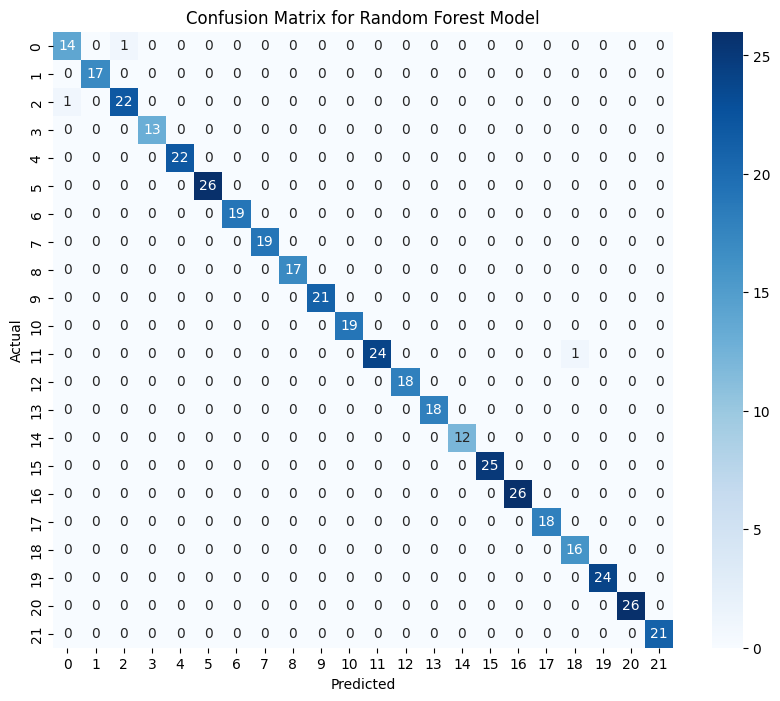

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
type(Xtrain)

numpy.ndarray

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
  features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
  target = crop['crop_num']

  labels = crop['crop_num']



In [ ]:
data = np.array([[85,	58,	41,	21.770462,	80.319644,	7.038096,	226.655537]])
crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}


prediction = RF.predict(data)
print(prediction)
if prediction[0] in crop_dict:
    crop = crop_dict[prediction[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[8]
Apple is a best crop to be cultivated 


In [ ]:
data = np.array([[85,	58,	41,	21.770462,	80.319644,	7.038096,	226.655537]])
prediction = RF.predict(data)
print(prediction)

[8]


In [ ]:
data = np.array([[83,	57,	19,	25.730444,	70.747393,	6.877869,	98.737713]])
prediction = RF.predict(data)
print(prediction)

[8]


In [ ]:
data = np.array([[40,	58,	75,	18.591908,	14.779596,	7.168096,	89.609825	]])
prediction = RF.predict(data)
print(prediction)

[8]


In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '/content/drive/MyDrive/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
import pickle
pickle.dump(RF,open('/content/drive/MyDrive/CropModel/model.pkl','wb'))
pickle.dump(ms,open('/content/drive/MyDrive/CropModel/minmaxscaler.pkl','wb'))
pickle.dump(sc,open('/content/drive/MyDrive/CropModel/standscaler.pkl','wb'))

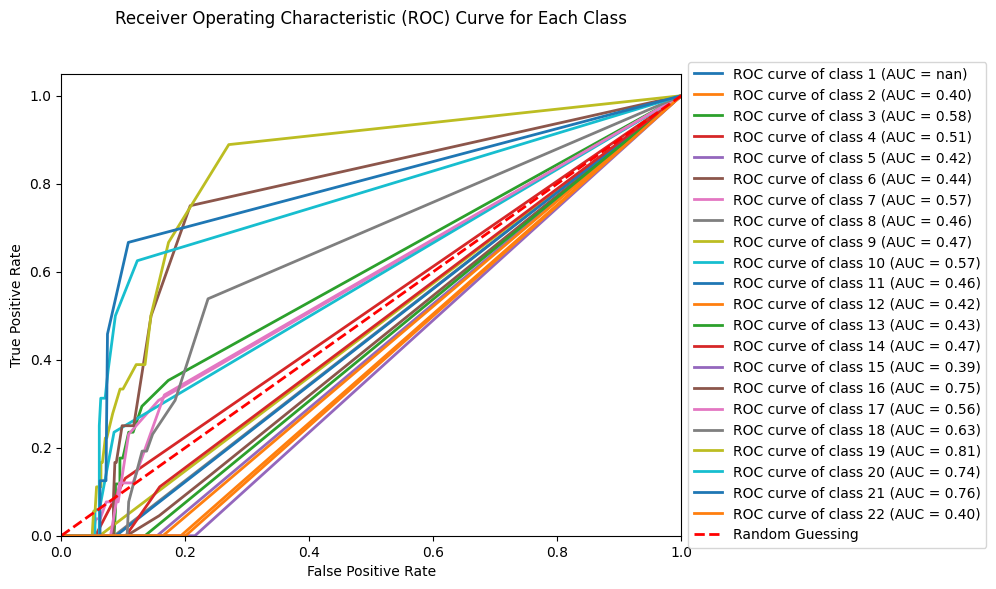

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Get predicted probabilities for each class
predicted_probs = RF.predict_proba(Xtest)

# Compute false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Create binary labels for the current class
    binary_labels = (Ytest == i)

    # Extract probabilities for the current class
    predicted_probs_class = predicted_probs[:, i]

    # Compute ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(binary_labels, predicted_probs_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i+1, roc_auc[i]))

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class\n\n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


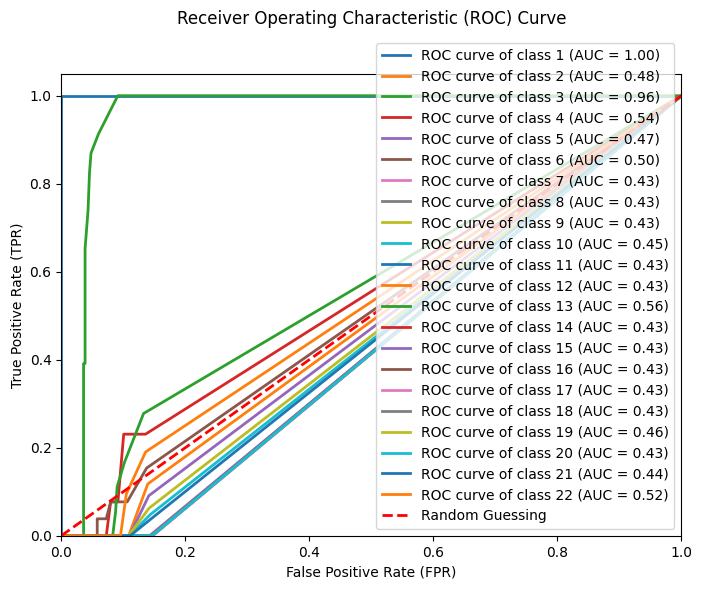

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Ensure predicted_probs has the correct shape (n_samples, 1)
predicted_probs = predicted_probs.reshape(-1, 1)  # Assuming predicted_probs is a 2D array
predicted_probs = RF.predict_proba(Xtest)
# Convert Ytest to a NumPy array for label_binarize
Ytest = np.array(Ytest)  # Assuming Ytest is a list or other iterable

# Binarize the labels
n_classes = len(np.unique(Ytest))
y_test_bin = label_binarize(Ytest, classes=np.unique(Ytest))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probs[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve\n\n')
plt.legend(loc='lower right')
plt.show()
